In [1]:
%load_ext autoreload
%autoreload 1
%aimport actableai.timeseries.params
%aimport actableai.timeseries.models

import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt

import ray
import torch
import numpy as np
import json
import mxnet as mx
import json

ModuleNotFoundError: No module named 'mxnet'

In [ ]:
ray.init()

### Evaluate uni-variate ts forecasting

In [ ]:
df = pd.read_csv("data/retail_sales.csv")
df.index = pd.to_datetime(df["date"], format='%Y/%m/%d')
df.sort_index(inplace=True)

In [ ]:
from gluonts.model.r_forecast import RForecastPredictor

In [ ]:
prediction_length = 100
m = actableai.timeseries.models.AAITimeseriesForecaster(
    prediction_length, 
    mx.cpu(), 
    torch.device("cpu"),
    univariate_model_params=[
#         actableai.timeseries.params.FeedForwardParams(epochs=1),
#         actableai.timeseries.params.DeepARParams(
#             num_cells=(1, 20), num_layers=(1, 3), epochs=(10, 50),
#             context_length=(prediction_length, prediction_length*3)),
        actableai.timeseries.params.ProphetParams(),
#         actableai.timeseries.params.RForecastParams()
    ])

In [6]:
m.fit(
    df[["numer_retail_sales",]], 
    trials=3, 
    max_concurrent=1,
    loss="mean_wQuantileLoss",
    eval_samples=3,
)

2021-03-31 16:22:45,875	WARNING function_runner.py:541 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/name
trainable_f2889432,RUNNING,,39,1,24,0.00169304,0.00387966,FeedForward


(pid=84339) /Users/trung/Sources/actableai-ml/gluonts/__init__.py:23: UserWarning: Module gluonts was already imported from /Users/trung/Sources/actableai-ml/gluonts/__init__.py, but /Users/trung/miniconda3/envs/actableai-ml/lib/python3.7/site-packages/gluonts-0.5.1.dev136+ga1034b0-py3.7.egg is being added to sys.path
(pid=84339)   __version__ = get_distribution(__name__).version
  0%|          | 0/50 [00:00<?, ?it/s]


(pid=84339) learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.
(pid=84339) <gluonts.model.predictor.RepresentableBlockPredictor object at 0x7feb667b6590>
Result for trainable_f2889432:
  date: 2021-03-31_16-23-06
  done: false
  experiment_id: c572a3040dc44356a08afccc93e0694a
  hostname: 192.168.1.102
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.05098498149935836
  node_ip: 192.168.1.102
  pid: 84339
  time_since_restore: 3.865018844604492
  time_this_iter_s: 3.865018844604492
  time_total_s: 3.865018844604492
  timestamp: 1617204186
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f2889432
  


Running evaluation: 100%|██████████| 3/3 [00:00<00:00, 23.20it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/name,iter,total time (s),mean_wQuantileLoss
trainable_f2889432,RUNNING,pid=84339,39,1,24,0.00169304,0.00387966,FeedForward,1,3.86502,0.050985


Result for trainable_f2889432:
  date: 2021-03-31_16-23-06
  done: true
  experiment_id: c572a3040dc44356a08afccc93e0694a
  experiment_tag: 1_context_length=39,epochs=1,hidden_layer_size=24,l2=0.001693,learning_rate=0.0038797,name=FeedForward
  hostname: 192.168.1.102
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.05098498149935836
  node_ip: 192.168.1.102
  pid: 84339
  time_since_restore: 3.865018844604492
  time_this_iter_s: 3.865018844604492
  time_total_s: 3.865018844604492
  timestamp: 1617204186
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: f2889432
  


(pid=84342) /Users/trung/Sources/actableai-ml/gluonts/__init__.py:23: UserWarning: Module gluonts was already imported from /Users/trung/Sources/actableai-ml/gluonts/__init__.py, but /Users/trung/miniconda3/envs/actableai-ml/lib/python3.7/site-packages/gluonts-0.5.1.dev136+ga1034b0-py3.7.egg is being added to sys.path
(pid=84342)   __version__ = get_distribution(__name__).version
  0%|          | 0/50 [00:00<?, ?it/s]


(pid=84342) learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.
(pid=84342) <gluonts.model.predictor.RepresentableBlockPredictor object at 0x7fbb60905950>
Result for trainable_fe3394d0:
  date: 2021-03-31_16-23-22
  done: false
  experiment_id: 077ec0de83084021a5d832254ea13d74
  hostname: 192.168.1.102
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.05328761430881791
  node_ip: 192.168.1.102
  pid: 84342
  time_since_restore: 2.5234248638153076
  time_this_iter_s: 2.5234248638153076
  time_total_s: 2.5234248638153076
  timestamp: 1617204202
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fe3394d0
  


Running evaluation: 100%|██████████| 3/3 [00:00<00:00, 27.54it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/name,iter,total time (s),mean_wQuantileLoss
trainable_fe3394d0,RUNNING,pid=84342,56,1,17,0.00139808,0.00569348,FeedForward,1,2.52342,0.0532876
trainable_f2889432,TERMINATED,,39,1,24,0.00169304,0.00387966,FeedForward,1,3.86502,0.050985


Result for trainable_fe3394d0:
  date: 2021-03-31_16-23-22
  done: true
  experiment_id: 077ec0de83084021a5d832254ea13d74
  experiment_tag: 2_context_length=56,epochs=1,hidden_layer_size=17,l2=0.0013981,learning_rate=0.0056935,name=FeedForward
  hostname: 192.168.1.102
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.05328761430881791
  node_ip: 192.168.1.102
  pid: 84342
  time_since_restore: 2.5234248638153076
  time_this_iter_s: 2.5234248638153076
  time_total_s: 2.5234248638153076
  timestamp: 1617204202
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: fe3394d0
  


(pid=84341) /Users/trung/Sources/actableai-ml/gluonts/__init__.py:23: UserWarning: Module gluonts was already imported from /Users/trung/Sources/actableai-ml/gluonts/__init__.py, but /Users/trung/miniconda3/envs/actableai-ml/lib/python3.7/site-packages/gluonts-0.5.1.dev136+ga1034b0-py3.7.egg is being added to sys.path
(pid=84341)   __version__ = get_distribution(__name__).version
  0%|          | 0/50 [00:00<?, ?it/s]


(pid=84341) learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


Running evaluation: 100%|██████████| 3/3 [00:00<00:00, 21.56it/s]


(pid=84341) <gluonts.model.predictor.RepresentableBlockPredictor object at 0x7fb2fa112390>
Result for trainable_08046638:
  date: 2021-03-31_16-23-38
  done: false
  experiment_id: 9cdac3ab0ae148a2ac895b07c1065d49
  hostname: 192.168.1.102
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.05283998426607167
  node_ip: 192.168.1.102
  pid: 84341
  time_since_restore: 3.6724660396575928
  time_this_iter_s: 3.6724660396575928
  time_total_s: 3.6724660396575928
  timestamp: 1617204218
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 08046638
  


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/name,iter,total time (s),mean_wQuantileLoss
trainable_08046638,RUNNING,pid=84341,27,1,37,0.00553776,0.00907282,FeedForward,1,3.67247,0.05284
trainable_f2889432,TERMINATED,,39,1,24,0.00169304,0.00387966,FeedForward,1,3.86502,0.050985
trainable_fe3394d0,TERMINATED,,56,1,17,0.00139808,0.00569348,FeedForward,1,2.52342,0.0532876


Result for trainable_08046638:
  date: 2021-03-31_16-23-38
  done: true
  experiment_id: 9cdac3ab0ae148a2ac895b07c1065d49
  experiment_tag: 3_context_length=27,epochs=1,hidden_layer_size=37,l2=0.0055378,learning_rate=0.0090728,name=FeedForward
  hostname: 192.168.1.102
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.05283998426607167
  node_ip: 192.168.1.102
  pid: 84341
  time_since_restore: 3.6724660396575928
  time_this_iter_s: 3.6724660396575928
  time_total_s: 3.6724660396575928
  timestamp: 1617204218
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 08046638
  


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/name,iter,total time (s),mean_wQuantileLoss
trainable_f2889432,TERMINATED,,39,1,24,0.00169304,0.00387966,FeedForward,1,3.86502,0.050985
trainable_fe3394d0,TERMINATED,,56,1,17,0.00139808,0.00569348,FeedForward,1,2.52342,0.0532876
trainable_08046638,TERMINATED,,27,1,37,0.00553776,0.00907282,FeedForward,1,3.67247,0.05284


2021-03-31 16:23:38,195	INFO tune.py:545 -- Total run time: 52.39 seconds (51.17 seconds for the tuning loop).
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:03<00:00, 13.00it/s, epoch=1/1, avg_epoch_loss=12.7]


In [ ]:
forecast = m.predict(df[["numer_retail_sales",]][:df.shape[0] - prediction_length])
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(df.index, df[["numer_retail_sales",]])
ax.plot(pd.to_datetime(forecast["date"]), forecast["values"][0][0]["q50"])
ax.fill_between(
    pd.to_datetime(forecast["date"]), 
    forecast["values"][0][0]["q5"], 
    forecast["values"][0][0]["q95"], 
    color='b', alpha=.1)

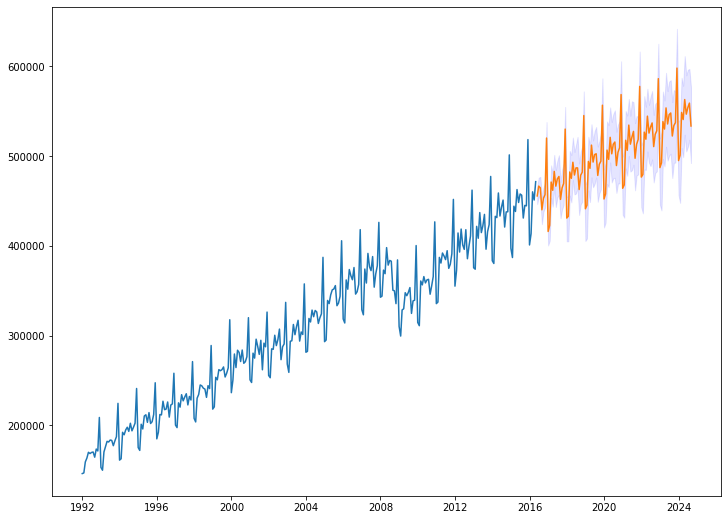

In [65]:
forecast = m.predict(df[["numer_retail_sales",]])
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(df.index, df[["numer_retail_sales",]])
ax.plot(pd.to_datetime(forecast["date"]), forecast["values"][0][0]["q50"])
ax.fill_between(
    pd.to_datetime(forecast["date"]), 
    forecast["values"][0][0]["q5"], 
    forecast["values"][0][0]["q95"], 
    color='b', alpha=.1)

### Evaluate multi-variate ts forecasting

In [15]:
df = pd.read_csv("data/jane_empties.csv")

In [16]:
df.index = pd.to_datetime(df["order_date"], format='%m/%d/%Y')
df.sort_index(inplace=True)

In [17]:
prediction_length = 10
m = actableai.timeseries.models.AAITimeseriesForecaster(
    prediction_length, mx.cpu(), torch.device("cpu"),
    transformer_temp_flow_params=actableai.timeseries.params.TransformerTempFlowParams(epochs=1),
#     gp_var_params=actableai.timeseries.params.GPVarParams(epochs=1),
)

TypeError: __init__() got an unexpected keyword argument 'transformer_temp_flow_params'

In [6]:
m.fit(df[["return_customers", "new_customers"]], trials=1) 

2020-12-26 15:56:49,204	WARNING function_runner.py:486 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,model/context_length,model/d_model,model/epochs,model/flow_type,model/l2,model/learning_rate,model/name,model/num_heads
trainable_f68cf2c2,RUNNING,,79,16,1,MAF,0.00313251,0.0090419,TransformerTempFlow,4


(pid=34923) /Users/trung/Sources/actableai-ml/gluonts/__init__.py:23: UserWarning: Module gluonts was already imported from /Users/trung/Sources/actableai-ml/gluonts/__init__.py, but /Users/trung/miniconda3/envs/actableai-ml/lib/python3.7/site-packages/gluonts-0.5.1.dev136+ga1034b0-py3.7.egg is being added to sys.path
(pid=34923)   __version__ = get_distribution(__name__).version
0it [00:00, ?it/s]3) 
1it [00:00,  5.93it/s, avg_epoch_loss=2.12, epoch=0]
2it [00:00,  5.69it/s, avg_epoch_loss=2.31, epoch=0]
3it [00:00,  5.69it/s, avg_epoch_loss=2.21, epoch=0]
4it [00:00,  5.28it/s, avg_epoch_loss=2.34, epoch=0]
5it [00:00,  5.47it/s, avg_epoch_loss=2.26, epoch=0]
6it [00:01,  5.16it/s, avg_epoch_loss=2.2, epoch=0] 
7it [00:01,  4.64it/s, avg_epoch_loss=2.18, epoch=0]
8it [00:01,  4.84it/s, avg_epoch_loss=2.16, epoch=0]
9it [00:01,  4.92it/s, avg_epoch_loss=2.13, epoch=0]
10it [00:01,  4.90it/s, avg_epoch_loss=2.1, epoch=0]
11it [00:02,  4.60it/s, avg_epoch_loss=2.1, epoch=0]
12it [00:02,

TuneError: ('Trials did not complete', [trainable_f68cf2c2])

In [8]:
m.score(df[["return_customers", "new_customers"]])

Running evaluation: 1it [00:00, 20.91it/s]
Running evaluation: 1it [00:00, 18.01it/s]


{'item_metrics':    item_id       MSE  abs_error  abs_target_sum  abs_target_mean  \
 0      NaN  9.831557  24.319380            62.0         6.888889   
 0      NaN  9.980836  23.542982            52.0         5.200000   
 
    seasonal_error      MASE      MAPE     sMAPE  OWA      MSIS  \
 0        2.571355  1.050867  0.425025  0.429096  NaN  6.577538   
 0        2.514672  0.936225  0.907087  0.474772  NaN  5.696017   
 
    QuantileLoss[0.1]  Coverage[0.1]  QuantileLoss[0.5]  Coverage[0.5]  \
 0           9.536025            0.0          24.319380       0.555556   
 0           9.198685            0.2          23.542981       0.700000   
 
    QuantileLoss[0.95]  Coverage[0.95]  
 0            7.243873             1.0  
 0            7.411017             1.0  ,
 'agg_metrics': {'0_MSE': 9.83155737982856,
  '0_abs_error': 24.319379806518555,
  '0_abs_target_sum': 62.0,
  '0_abs_target_mean': 6.888888888888889,
  '0_seasonal_error': 2.571354971664091,
  '0_MASE': 1.0508674771133042,


In [ ]:
m.predict(df[["return_customers", "new_customers"]])

### M4

In [7]:
# Load data
m4_info = pd.read_csv("data/M4-info.csv")
m4_info.index = m4_info['M4id']
m4_daily_train = pd.read_csv("data/Daily-train-m4.csv")
m4_daily_train.index = m4_daily_train['V1']
m4_hourly_train = pd.read_csv("data/Hourly-train-m4.csv")
m4_hourly_train.index = m4_hourly_train['V1']

In [8]:
m4_data = {'Info':m4_info,
           'Daily':m4_daily_train,
           'Hourly':m4_hourly_train}

In [9]:
num1_10 = np.arange(1, 11)
daily_series_name = ['D' + str(i) for i in num1_10]
hourly_series_name = ['H' + str(i) for i in num1_10]
daily_hourly_series_name = daily_series_name + hourly_series_name

In [13]:
def run_forecast(prediction_length, prediction_column_name, df, results):
    m = actableai.timeseries.models.AAITimeseriesForecaster(
        prediction_length, mx.cpu(), torch.device("cpu"),
        actableai.timeseries.params.DeepARParams(
            num_cells=(1, 20), num_layers=(1, 3), epochs=(10, 50),
            context_length=(prediction_length, prediction_length*3)),
        feed_forward_params=actableai.timeseries.params.FeedForwardParams(),
        prophet_params=actableai.timeseries.params.ProphetParams(),
        rforecast_params=actableai.timeseries.params.RForecastParams())
    
    m.fit(df[[prediction_column_name,]][:-prediction_length])
    predictions = m.predict(df[[prediction_column_name,]])
    print(predictions)
    with open('actableai_results.json', 'w') as json_file:
        results[prediction_column_name] = predictions["values"][0][0]['q50']
        json.dump(results, json_file)

In [14]:
# Run forecasting algorithm
results = {}
for series_name in daily_hourly_series_name:
    series_data = m4_data['Info'].loc[series_name,['StartingDate', 'Horizon', 'SP']]
    prediction_column_data = m4_data[series_data['SP']].loc[series_name].dropna().iloc[1:].values
    series_df = pd.DataFrame(prediction_column_data, columns=[series_name])

    if series_data['SP'] == 'Hourly':
        series_df.index = [pd.to_datetime(series_data['StartingDate'], format='%m/%d/%Y %H:%M') + timedelta(hours=i) for i in range(len(prediction_column_data))]
    elif series_data['SP'] == 'Daily':
        series_df.index = [pd.to_datetime(series_data['StartingDate'], format='%m/%d/%Y %H:%M') + timedelta(days=i) for i in range(len(prediction_column_data))]
        
    series_df = series_df.astype({series_name: float})
    run_forecast(series_data['Horizon'], series_name, series_df, results)

Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name
trainable_3ddac9b0,RUNNING,,47,72,11,0.00949333,0.00435757,,FeedForward
trainable_3ddc166c,PENDING,,,,,,,arima,RForecast
trainable_3ddd62d8,PENDING,,,,,,,ets,RForecast


  0%|          | 0/50 [00:00<?, ?it/s]


(pid=23966) learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.
Result for trainable_3ddac9b0:
  date: 2020-12-02_15-08-44
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 1
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 1.5320231914520264
  time_this_iter_s: 1.5320231914520264
  time_total_s: 1.5320231914520264
  timestamp: 1606921724
  timesteps_since_restore: 0
  train_loss: 7.008676586151123
  training_iteration: 1
  trial_id: 3ddac9b0
  


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,1,1.53202,7.00868
trainable_3ddc166c,RUNNING,,,,,,,arima,RForecast,,,
trainable_3ddd62d8,RUNNING,,,,,,,ets,RForecast,,,


  0%|          | 0/50 [00:00<?, ?it/s]
(pid=24021) /Users/trung/miniconda3/envs/actableai-ml/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Registered S3 method overwritten by 'quantmod':
(pid=24021)   method            from
(pid=24021)   as.zoo.data.frame zoo 
(pid=24021) 
(pid=24021)   warnings.warn(x, RRuntimeWarning)
(pid=24020) /Users/trung/miniconda3/envs/actableai-ml/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Registered S3 method overwritten by 'quantmod':
(pid=24020)   method            from
(pid=24020)   as.zoo.data.frame zoo 
(pid=24020) 
(pid=24020)   warnings.warn(x, RRuntimeWarning)
Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Result for trainable_3ddd62d8:
  date: 2020-12-02_15-08-48
  done: false
  experiment_id: 5879a0b7700d4b378fd1ecdfb300b6dd
  experiment_tag: 3_method_name=ets,name=RForecast
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.003926479003022162
  node_ip: 192.168.200.198
  pid: 24020
  time_since_restore: 5.1374428272247314
  time_this_iter_s: 5.1374428272247314
  time_total_s: 5.1374428272247314
  timestamp: 1606921728
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 3ddd62d8
  


Running evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


Result for trainable_3ddc166c:
  date: 2020-12-02_15-08-49
  done: false
  experiment_id: 3de73b50d440449ebc2761fcdfe0e6ef
  experiment_tag: 2_method_name=arima,name=RForecast
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 1
  mean_wQuantileLoss: 0.0037521083654434672
  node_ip: 192.168.200.198
  pid: 24021
  time_since_restore: 5.8734118938446045
  time_this_iter_s: 5.8734118938446045
  time_total_s: 5.8734118938446045
  timestamp: 1606921729
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 3ddc166c
  


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,3,6.06917,6.22278,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-08-50
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 4
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 7.923949241638184
  time_this_iter_s: 1.8547770977020264
  time_total_s: 7.923949241638184
  timestamp: 1606921730
  timesteps_since_restore: 0
  train_loss: 6.227621841430664
  training_iteration: 4
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,9,11.7614,5.7806,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-08-56
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 11
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 13.20219087600708
  time_this_iter_s: 0.7160189151763916
  time_total_s: 13.20219087600708
  timestamp: 1606921736
  timesteps_since_restore: 0
  train_loss: 5.7073978996276855
  training_iteration: 11
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,16,16.8709,5.15808,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-01
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 18
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 18.32885193824768
  time_this_iter_s: 0.7169959545135498
  time_total_s: 18.32885193824768
  timestamp: 1606921741
  timesteps_since_restore: 0
  train_loss: 5.307254037857056
  training_iteration: 18
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,23,21.9951,5.13914,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-06
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 25
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 23.454928874969482
  time_this_iter_s: 0.7425746917724609
  time_total_s: 23.454928874969482
  timestamp: 1606921746
  timesteps_since_restore: 0
  train_loss: 5.112382793426514
  training_iteration: 25
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,30,27.2385,4.9853,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-11
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 32
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 28.693817853927612
  time_this_iter_s: 0.7328777313232422
  time_total_s: 28.693817853927612
  timestamp: 1606921751
  timesteps_since_restore: 0
  train_loss: 4.948979244232178
  training_iteration: 32
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,37,32.5274,4.92797,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-16
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 39
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 34.04240703582764
  time_this_iter_s: 0.7493000030517578
  time_total_s: 34.04240703582764
  timestamp: 1606921756
  timesteps_since_restore: 0
  train_loss: 4.824690227508545
  training_iteration: 39
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,44,37.8415,4.79389,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-22
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 46
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 39.35757112503052
  time_this_iter_s: 0.7666501998901367
  time_total_s: 39.35757112503052
  timestamp: 1606921762
  timesteps_since_restore: 0
  train_loss: 4.757956466674805
  training_iteration: 46
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,51,43.0394,4.7853,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-27
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 53
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 44.59177207946777
  time_this_iter_s: 0.7788949012756348
  time_total_s: 44.59177207946777
  timestamp: 1606921767
  timesteps_since_restore: 0
  train_loss: 4.87111801147461
  training_iteration: 53
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,57,48.8112,4.86132,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-33
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 58
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 50.21079611778259
  time_this_iter_s: 1.399613857269287
  time_total_s: 50.21079611778259
  timestamp: 1606921773
  timesteps_since_restore: 0
  train_loss: 4.80502688407898
  training_iteration: 58
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,61,54.0997,4.78338,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-38
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 62
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 55.69179391860962
  time_this_iter_s: 1.592073917388916
  time_total_s: 55.69179391860962
  timestamp: 1606921778
  timesteps_since_restore: 0
  train_loss: 4.7706516742706295
  training_iteration: 62
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,65,59.1503,4.7332,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-44
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 67
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 61.25938892364502
  time_this_iter_s: 1.003964900970459
  time_total_s: 61.25938892364502
  timestamp: 1606921784
  timesteps_since_restore: 0
  train_loss: 4.67249698638916
  training_iteration: 67
  trial_id: 3ddac9b0
  


  0%|          | 0/50 [00:00<?, ?it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),train_loss,mean_wQuantileLoss
trainable_3ddac9b0,RUNNING,192.168.200.198:23966,47,72,11,0.00949333,0.00435757,,FeedForward,70,65.8925,4.64674,
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,,0.00392648


  0%|          | 0/50 [00:00<?, ?it/s]


Result for trainable_3ddac9b0:
  date: 2020-12-02_15-09-51
  done: false
  experiment_id: cfb1a867e86c4ddf994e0132c5263961
  experiment_tag: 1_context_length=47,epochs=72,hidden_layer_size=11,l2=0.0094933,learning_rate=0.0043576,name=FeedForward
  hostname: Trungs-MacBook-Air.local
  iterations_since_restore: 71
  node_ip: 192.168.200.198
  pid: 23966
  time_since_restore: 68.73437404632568
  time_this_iter_s: 2.8418939113616943
  time_total_s: 68.73437404632568
  timestamp: 1606921791
  timesteps_since_restore: 0
  train_loss: 4.554590768814087
  training_iteration: 71
  trial_id: 3ddac9b0
  


Running evaluation: 100%|██████████| 1/1 [00:00<00:00, 27.49it/s]


Trial name,status,loc,model/context_length,model/epochs,model/hidden_layer_size,model/l2,model/learning_rate,model/method_name,model/name,iter,total time (s),mean_wQuantileLoss
trainable_3ddac9b0,TERMINATED,,47,72,11,0.00949333,0.00435757,,FeedForward,73,69.8845,0.00761313
trainable_3ddc166c,TERMINATED,,,,,,,arima,RForecast,1,5.87341,0.00375211
trainable_3ddd62d8,TERMINATED,,,,,,,ets,RForecast,1,5.13744,0.00392648


{'date': ['1996-12-01 12:00:00', '1996-12-02 12:00:00', '1996-12-03 12:00:00', '1996-12-04 12:00:00', '1996-12-05 12:00:00', '1996-12-06 12:00:00', '1996-12-07 12:00:00', '1996-12-08 12:00:00', '1996-12-09 12:00:00', '1996-12-10 12:00:00', '1996-12-11 12:00:00', '1996-12-12 12:00:00', '1996-12-13 12:00:00', '1996-12-14 12:00:00'], 'values': [[{'q5': array([2020.39493003, 2018.92508827, 2014.03852819, 2008.91330144,
       2009.33877027, 2009.20655386, 2004.18308696, 2004.15057952,
       2004.06112133, 2002.43013896, 1999.86029701, 1997.48079739,
       1998.9329068 , 1996.91917374]), 'q50': array([2030.72851108, 2030.66646767, 2033.79531114, 2037.31472246,
       2037.12654939, 2037.15672276, 2036.33870924, 2038.8018629 ,
       2038.84200833, 2037.66539431, 2039.60148899, 2040.03788015,
       2044.43627428, 2042.6744421 ]), 'q95': array([2040.07538306, 2047.99081258, 2056.56564677, 2061.15662826,
       2065.29622139, 2065.10222947, 2065.62381459, 2077.78904861,
       2077.85859964

TypeError: Object of type ndarray is not JSON serializable

In [12]:
print("")